In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names
type(data)

sklearn.utils.Bunch

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

In [ ]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
train=fetch_20newsgroups(subset='train', categories=categories)
test=fetch_20newsgroups(subset='test', categories=categories)
#print(train.data[5])
print(len(train.data))
print(test.target_names)

11314
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
#importing packages
from sklearn.feature_extraction.text import TfidfVectorizer
#TfidfVectrizer gives weight to diff words in a document
from sklearn.naive_bayes import MultinomialNB
#takes info from vectorizer and pump into multinomialnb
#so it just organising the flow
from sklearn.pipeline import make_pipeline

#creating a model
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#training the model
model.fit(train.data, train.target)
#train data goes into tfidfvectorizer so it weights 2.4 million tokens...takes words
#gives weights and puts into naive bayes
#creating lables for the test data
labels=model.predict(test.data)


Text(91.68,0.5,'predicted label')

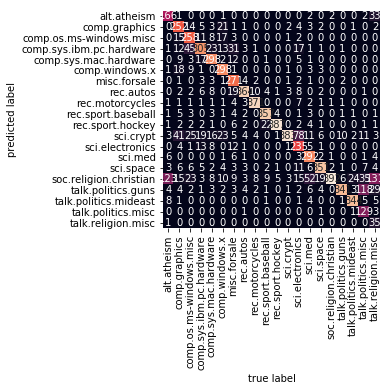

In [ ]:
from sklearn.metrics import confusion_matrix
mat= confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
           xticklabels=train.target_names,yticklabels=train.target_names)
#plotting heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel("predicted label")

In [ ]:
#predict category on new data based on trained model
def predict_category(s,train=train, model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]


In [ ]:
predict_category('jesus christ')

'soc.religion.christian'

In [ ]:
predict_category('Sending to space station')

'sci.space'

In [ ]:
predict_Category("bmw audi")

'rec.autos'

In [ ]:
predict_category("president of india is flag hoisting")

'talk.politics.mideast'

In [ ]:
b=MultinomialNB()


In [ ]:
b

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#goto TFIDF folder for checking these functions at root level

OR try Converting text to vectors. In order to feed predictive or clustering models with the text data, one first need to turn the text into vectors of numerical values suitable for statistical analysis.

 sklearn.feature_extraction.text extracts TF-IDF vectors of unigram tokens
from a subset of 20news:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
categories = ['alt.atheism', 'talk.religion.misc',
               'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                       categories=categories)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.data

array([0.0270301 , 0.32132455, 0.2032566 , ..., 0.10984828, 0.10984828,
       0.10984828])

In [ ]:
vectors.shape

(2034, 34118)

The extracted TF-IDF vectors are very sparse, with an average of 159 non-zero components by sample in a more than 30000-dimensional space (less than .5% non-zero features):

In [ ]:
#nnz is  a property showing no of values stored
vectors.nnz / float(vectors.shape[0])


159.0132743362832

sklearn.datasets.fetch_20newsgroups_vectorized is a function which returns ready-to-use tfidf features instead of file names.


#Filtering text for more realistic training
It is easy for a classifier to overfit on particular things that appear in the 20 Newsgroups data, such as newsgroup headers. Many classifiers achieve very high F-scores, but their results would not generalize to other documents that aren’t from this window of time.

In [ ]:
from sklearn import metrics
newsgroups_test = fetch_20newsgroups(subset='test',
                                     categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
pred = clf.predict(vectors_test)
metrics.f1_score(newsgroups_test.target, pred, average='macro')


0.8821359240272957

In [ ]:
#take a look at what the most informative features are:

In [ ]:
import numpy as np
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
            top10 = np.argsort(classifier.coef_[i])[-10:]
            print("%s: %s" % (category, " ".join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)

alt.atheism: edu it and in you that is of to the
comp.graphics: edu in graphics it is for and of to the
sci.space: edu it that is in and space to of the
talk.religion.misc: not it you in is that and to of the


You can now see many things that these features have overfit to:

Almost every group is distinguished by whether headers such as NNTP-Posting-Host: and Distribution: appear more or less often.
Another significant feature involves whether the sender is affiliated with a university, as indicated either by their headers or their signature.
The word “article” is a significant feature, based on how often people quote previous posts like this: “In article [article ID], [name] <[e-mail address]> wrote:”
Other features match the names and e-mail addresses of particular people who were posting at the time.

With such an abundance of clues that distinguish newsgroups, the classifiers barely have to identify topics from text at all, and they all perform at the same high level.

For this reason, the functions that load 20 Newsgroups data provide a parameter called remove, telling it what kinds of information to strip out of each file. remove should be a tuple containing any subset of ('headers', 'footers', 'quotes'), telling it to remove headers, signature blocks, and quotation blocks respectively.

In [ ]:
newsgroups_test = fetch_20newsgroups(subset='test',
...                                      remove=('headers', 'footers', 'quotes'),
...                                      categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)
metrics.f1_score(pred, newsgroups_test.target, average='macro')

0.7731035068127478

This classifier lost over a lot of its F-score, just because we removed metadata that has little to do with topic classification. It loses even more if we also strip this metadata from the training data:

In [ ]:
#The F-score will be lower because it is more realistic.